# Генерация значений, распределенных по нормальному закону

In [2]:
%pylab inline
from ipywidgets import interact, interact_manual

Populating the interactive namespace from numpy and matplotlib


In [3]:
# seed(777)
x=normal(size=400)

x

array([ 0.23120861, -1.13035336, -0.75541706,  0.3399831 ,  0.70087753,
       -1.8468844 ,  0.89523373, -0.64115121,  0.41718888, -1.02980367,
        0.11494591, -0.23881834,  0.60486424, -0.74488507, -0.59857993,
        0.10299283, -1.60911897,  0.54550909, -0.15298063,  0.59456693,
        0.37492326,  0.38215251,  1.14351253,  2.67854824,  1.08403478,
       -0.96608343, -0.40158015,  0.89326102, -1.50380539, -1.05120884,
       -0.3850054 , -1.13980833,  1.05423884,  0.48010061, -0.68002615,
       -1.41169649,  0.24907735, -0.2584795 ,  0.09449135, -0.21496222,
       -1.24161168,  0.00712201,  0.53839394,  0.09692856, -1.11748364,
        1.324818  ,  1.0379841 ,  0.40874335,  0.49678492, -0.74784018,
       -0.65782072,  0.00627408,  1.3758015 ,  0.3826564 ,  1.64964544,
       -0.60576803,  0.41081117, -0.66642312,  0.45898613, -0.30276211,
        1.00358343,  1.64675861,  1.00112079, -0.17903751,  0.03158357,
        0.3683233 ,  0.12423532, -0.19345456, -0.89977075, -0.38

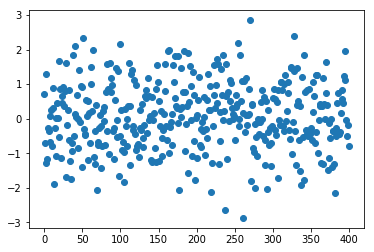

In [8]:
plot(x,'o');

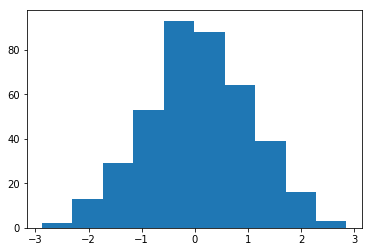

In [9]:
hist(x);

У нормального распределения можно задать два параметра - `loc` (локализацию) и `scale` (шкалу, размах). Локализация сдвигает центр распределения туда, где ожидается среднее значение. Шкала задает размер ожидаемого стандартного отклонения.

По-умолчанию `loc=0.0, scale=1.0`, что дает стандартное нормальное распределение.

Если при z-нормализации мы отнимаем среднее и делим на стандартное отклонение, то при генерации распределения с заданными параметрами мы прибавляем среднее (задаем `loc`) и умножаем на стандартное отклонение (задаем `scale`).

Например, возьмем выборку и посчитаем ее среднее и стандартное отклонение.

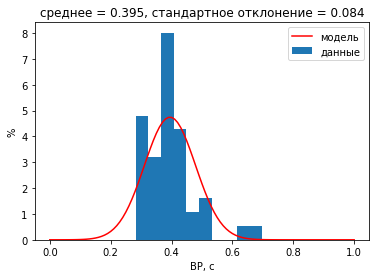

In [10]:
lps=loadtxt('lps')
vv=lps[:,1]
hist(vv, normed=True, label='данные')
#найдем характеристики распределения (предположительно нормального)
M=mean(vv); S=std(vv);
xx=frange(0,1,0.01) #подробные значения абсцисс для гладкой кривой
yy=normpdf(xx, M,S)
plot(xx,yy,'r-', label='модель'); legend(); xlabel('ВР, с'); ylabel('%');
title('среднее = {:.3f}, стандартное отклонение = {:.3f}'.format(M,S));

Наилучшим предсказанием, каким будет следующее значение из этой выборки, является среднее значение. Однако если нужно предсказать несколько значений (т.е. сгенерить выборку значений, похожих на эмпирические) и все они будут равны среднему, то один параметр мы повторим (среднее будет такое же), а другой нет (стандартное отклонение будет равно 0). Статистическая модель должна давать выборку 

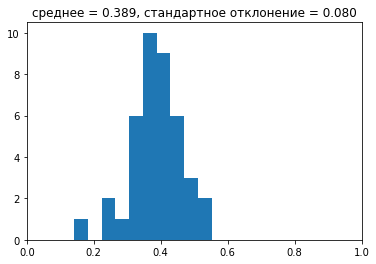

In [11]:
xm = normal(M,S, 40)
hist(xm); xlim(0,1)
title('среднее = {:.3f}, стандартное отклонение = {:.3f}'.format(mean(xm),std(xm)));

Повторите выполнение предыдущей ячейки несколько раз и обратите внимание, что параметры созданного выборочного распределения отличаются от заданных в модели. Они похожи, но отличаются. Т.е. варьируют в некоторых пределах.
Такое повторное многократное создание случайных выборок для одной и тоже модели и последующая оценка вариации параметров этих выборок лежит в основе идеи о доверительном интервале.

Также можно сгенерить выборки для других важных статистических распределений.
- random.standard_t - t Стьюдента
- random.chisquare - $\chi ^2$ (хи-квадрат)
- random.exponential - экcпоненциальное
- random.binomial - биномиальное
- random.poisson - Пуассона

См. [Полный список в документации](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.random.html#distributions)

Функции для генерации входят в модуль `random`, поэтому полный путь к ним будет, например, таким: `np.random.normal()`. Однако при использовании команды `%pylab` они становятся доступны без преамбулы. Чтобы убедиться, что переменные ссылаются на один и тот же объект используется оператор `is`.

In [ ]:
np.random.exponential is exponential

In [ ]:
random.exponential is exponential

(array([ 44.,   0.,   0.,  43.,   0.,   0.,  11.,   0.,   0.,   2.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

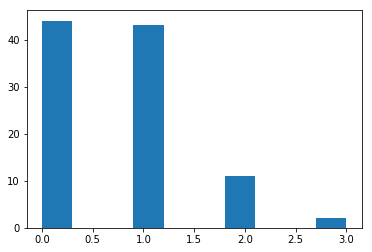

In [10]:
seed(777)
hist(binomial( 3, 0.25, size=100))

Напоследок, давайте экспериментально убедимся, что распределение Стьюдента при повышении степеней свободы переходит в нормальное.

Сравним генерацию выборок с моделями, вычисленными по формулам. Функции для работы со статистическими моделями доступны в модуле `scipy.stats`. Для каждого распределения можно получить моменты, PDF (Probability density function, плотность распределения), CDF (Cumulative distribution function), PPF (Percent point function) и др. производные от них функции.

In [19]:
import scipy.stats as stats

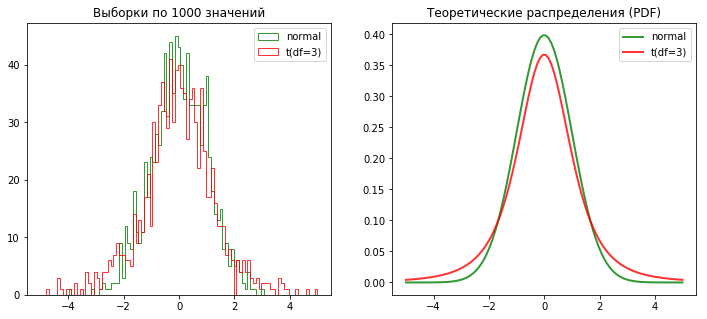

In [20]:
xx=linspace(-5,5, 100)

@interact(order=(1,6), df=(3,50), iseed=(0,1000))
def _pic(order=2, df=3, iseed=None):
         
    n = 10**order
    seed(iseed)

    fig, (ax1,ax2) = subplots(1,2, figsize=(12,5))

    ax1.hist(standard_normal(n), xx, alpha=0.8, color='g', histtype='step', label='normal');
    ax1.hist(standard_t(df, n), xx, alpha=0.8, color='r', histtype='step', label='t(df={})'.format(df));
    ax1.legend();
    ax1.set_title('Выборки по {} значений'.format(n))

    ax2.plot(xx, stats.norm.pdf(xx), 'g-', lw=2, alpha=0.8, label='normal')
    ax2.plot(xx, stats.t.pdf(xx, df), 'r-', lw=2, alpha=0.8, label='t(df={})'.format(df))
    legend();
    title('Теоретические распределения (PDF)')


Определите, 
- при каком значении степени свободы (df) распределения перестают отличаться;
- при каких размерах выборки экспериментальные данные начинают соответствовать теоретическим.
